In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_cluster = pd.read_csv('C:\\Users\\Pushkar\\OneDrive - The University of Kansas\\Test_DS_col\\mergedData.csv')

In [4]:
df_cluster.head()

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917


In [5]:
df_cluster.shape

(116, 8)

In [6]:
df_cluster.dtypes

year                   int64
SeaLevel             float64
Coal                 float64
Oil                  float64
Gas                  float64
CO2-Concentration    float64
TempGlobal           float64
TempLand             float64
dtype: object

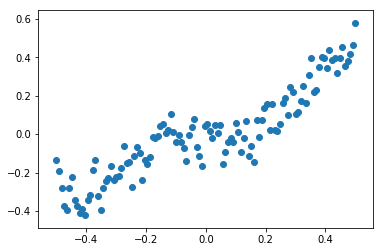

In [16]:
# normalizing in order to allow the K-Means algorithm to interpret it properly
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
Y = df_cluster[['year']]
X = df_cluster[['TempGlobal']]
X_norm = (X - X.mean()) / (X.max() - X.min())
Y_norm = (Y - Y.mean()) / (Y.max() - Y.min())
pl.scatter(Y_norm,X_norm)
pl.show()
#  raw scatter plot of our data 
# objective of using K-Means is to separate these observations into different clusters

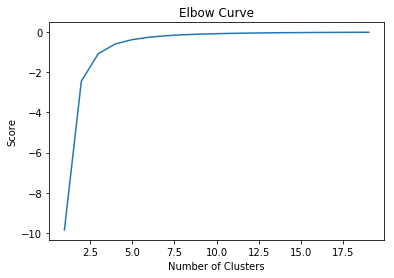

In [9]:
# generating an elbow curve in order to determine the number of clusters that we actually need for our k-means analysis
# ELBOW CURVE
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y_norm).score(Y_norm) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()
# we see that our score (or the percentage of variance explained by our clusters) levels off at 3 clusters.
# so, we will choose 3 as the value k and i.e. number of clusters

In [10]:
# Principal Component Analysis and K-Means
# The pca algorithm is being used to convert data that might be overly dispersed into a set of linear combinations
# that can more easily be interpreted
pca = PCA(n_components=1).fit(Y_norm)
pca_d = pca.transform(Y_norm)
pca_c = pca.transform(X_norm)

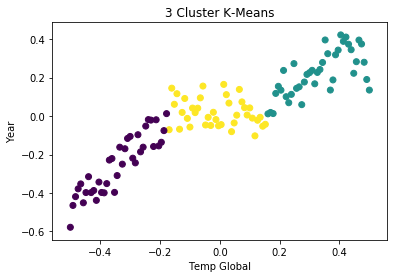

In [11]:
# we set n_clusters equal to 3, and upon generating the k-means output use the data originally transformed using pca in order
# to plot the clusters
kmeans=KMeans(n_clusters=3)
kmeansoutput=kmeans.fit(Y_norm)
kmeansoutput
pl.figure('3 Cluster K-Means')
pl.scatter(pca_d[:, 0], pca_c[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Temp Global')
pl.ylabel('Year')
pl.title('3 Cluster K-Means')
pl.show()
# k-means clusters, we see three distinct groups/clsuters

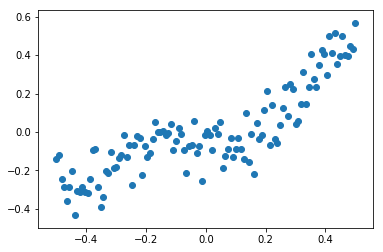

In [12]:
# Repeating the same process for TempLand
#clustering of TempLand and year
Y1 = df_cluster[['year']]
X1 = df_cluster[['TempLand']]
X1_norm = (X1 - X1.mean()) / (X1.max() - X1.min())
Y1_norm = (Y1 - Y1.mean()) / (Y1.max() - Y1.min())
pl.scatter(Y1_norm,X1_norm)
pl.show()

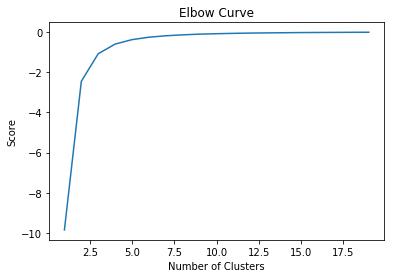

In [13]:
Nc1 = range(1, 20)
kmeans1 = [KMeans(n_clusters=i) for i in Nc1]
kmeans1
score1 = [kmeans1[i].fit(Y1_norm).score(Y1_norm) for i in range(len(kmeans1))]
score1
pl.plot(Nc1,score1)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [14]:
pca1 = PCA(n_components=1).fit(Y1_norm)
pca_d1 = pca1.transform(Y1_norm)
pca_c1 = pca1.transform(X1_norm)

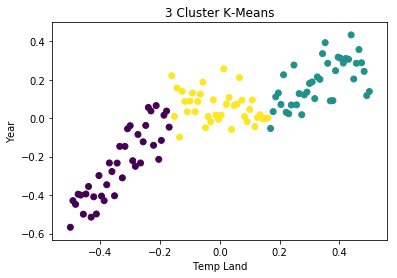

In [15]:
kmeans1=KMeans(n_clusters=3)
kmeansoutput1=kmeans1.fit(Y1_norm)
kmeansoutput1
pl.figure('3 Cluster K-Means')
pl.scatter(pca_d1[:, 0], pca_c1[:, 0], c=kmeansoutput1.labels_)
pl.xlabel('Temp Land')
pl.ylabel('Year')
pl.title('3 Cluster K-Means')
pl.show()